In [1]:
import wiggle.CarbonaraDataTools as cdt
import wiggle.SAXS_stuff as SAXS
import wiggle.geometry as geo
from wiggle import backmapping as bm


import numpy as np
import plotly.graph_objects as go

from scipy.interpolate import UnivariateSpline


### Plotting 3D structures

In [175]:
target_CA, _, _,_ = cdt.pull_structure_from_pdb('/Users/josh/Documents/PhD/MyPapers/carbonaraPapers/carbonaraTheory/code/apo_holo_pairs_complete/1cll_fullchain.pdb')
target_CA = target_CA[0]
original_CA , _, _,_ = cdt.pull_structure_from_pdb('/Users/josh/Documents/PhD/MyPapers/carbonaraPapers/carbonaraTheory/code/apo_holo_pairs_complete/1cfc_complete.pdb')
original_CA = original_CA[0]
CA = np.genfromtxt('/Users/josh/Documents/PhD/DevDungeon/carbonara/newFitData/calmodulin_WAXSiS/run4/mol1_sub_0_step_15_xyz.dat', skip_footer=1)
# _,_,_, aligned = geo.find_optimal_alignment(CA, target_CA[0], 3, 20)
_,_,_,aligned = geo.find_optimal_alignment(CA, target_CA)
_,_,_,aligned_o = geo.find_optimal_alignment(CA, original_CA)

In [176]:
geo.get_pair_rmsd(target_CA,original_CA)

7.227807226625819

In [177]:
geo.get_pair_rmsd(target_CA,CA)

17.33881553136878

In [178]:
geo.get_pair_rmsd(original_CA,CA)

16.26200486967889

In [179]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=CA[:,0], y=CA[:,1], z=CA[:,2], mode='lines', line=dict(color='black'), name='predicting 1cll'))
fig.add_trace(go.Scatter3d(x=aligned[:,0], y=aligned[:,1], z=aligned[:,2], mode='lines', line=dict(color='orange', width=5), name='target structure - 1cll'))
fig.add_trace(go.Scatter3d(x=aligned_o[:,0], y=aligned_o[:,1], z=aligned_o[:,2], mode='lines', line=dict(color='pink', width=5), name='original structure - 1cfc'))


xmin = np.min([CA[:,0], aligned[:,0], aligned_o[:,0]])
ymin = np.min([CA[:,1], aligned[:,1], aligned_o[:,1]])
zmin = np.min([CA[:,2], aligned[:,2], aligned_o[:,2]])

xmax = np.max([CA[:,0], aligned[:,0], aligned_o[:,0]])
ymax = np.max([CA[:,1], aligned[:,1], aligned_o[:,1]])
zmax = np.max([CA[:,2], aligned[:,2], aligned_o[:,2]])

fig.add_trace(go.Scatter3d(x=[xmin, xmax], y=[ymin, ymax], z=[zmin, zmax], mode='markers', line=dict(color='white')))

# keep the same aspect ratio
fig.update_layout(scene=dict(aspectmode='cube'), width=800, height=800)
fig.show()

In [146]:
ss

array(['-', '-', '-', 'S', 'S', 'S', 'H', 'H', 'H', 'H', 'H', 'H', 'H',
       'H', 'H', 'H', 'H', 'H', 'H', '-', '-', '-', '-', '-', '-', '-',
       'S', 'S', 'S', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H',
       '-', '-', '-', '-', '-', '-', 'H', 'H', 'H', 'H', 'H', 'H', 'H',
       'H', 'H', 'H', 'H', 'H', '-', '-', '-', '-', '-', 'S', 'S', 'S',
       'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', '-', '-',
       '-', '-', '-', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H',
       'H', 'H', '-', '-', '-', '-', '-', '-', '-', '-', '-', 'H', 'H',
       'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', '-', '-', '-', '-', '-',
       '-', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', '-', '-',
       '-', '-', '-', '-', '-', 'S', 'S', 'S', '-', 'H', 'H', 'H', 'H',
       'H', 'H', 'H', '-', '-'], dtype='<U1')

### Whats varying...

In [168]:
fp_arr = np.genfromtxt('fingerPrint1.dat', dtype=str, skip_header=1)
ss = fp_arr[1]
ss = np.asarray( list(ss) )

In [169]:
varying_sections = np.genfromtxt('varyingSectionSecondary1.dat')

In [170]:
x_lst, y_lst, z_lst, color_lst =  cdt.smooth_me_varying(CA, ss, varying_sections, oversample=5)
structure_fig = cdt.line_plotly(x_lst, y_lst, z_lst, color_lst, outline=True)

structure_fig.update_layout(height=600)
structure_fig.show()

In [153]:
x_lst, y_lst, z_lst, color_lst =  cdt.smooth_me_varying(aligned, ss, varying_sections, oversample=5)
structure_fig = cdt.line_plotly(x_lst, y_lst, z_lst, color_lst, outline=True)

structure_fig.update_layout(height=600)
structure_fig.show()

NameError: name 'varying_sections' is not defined

### Plotting SAXS data

Data is for 1CLL - the target


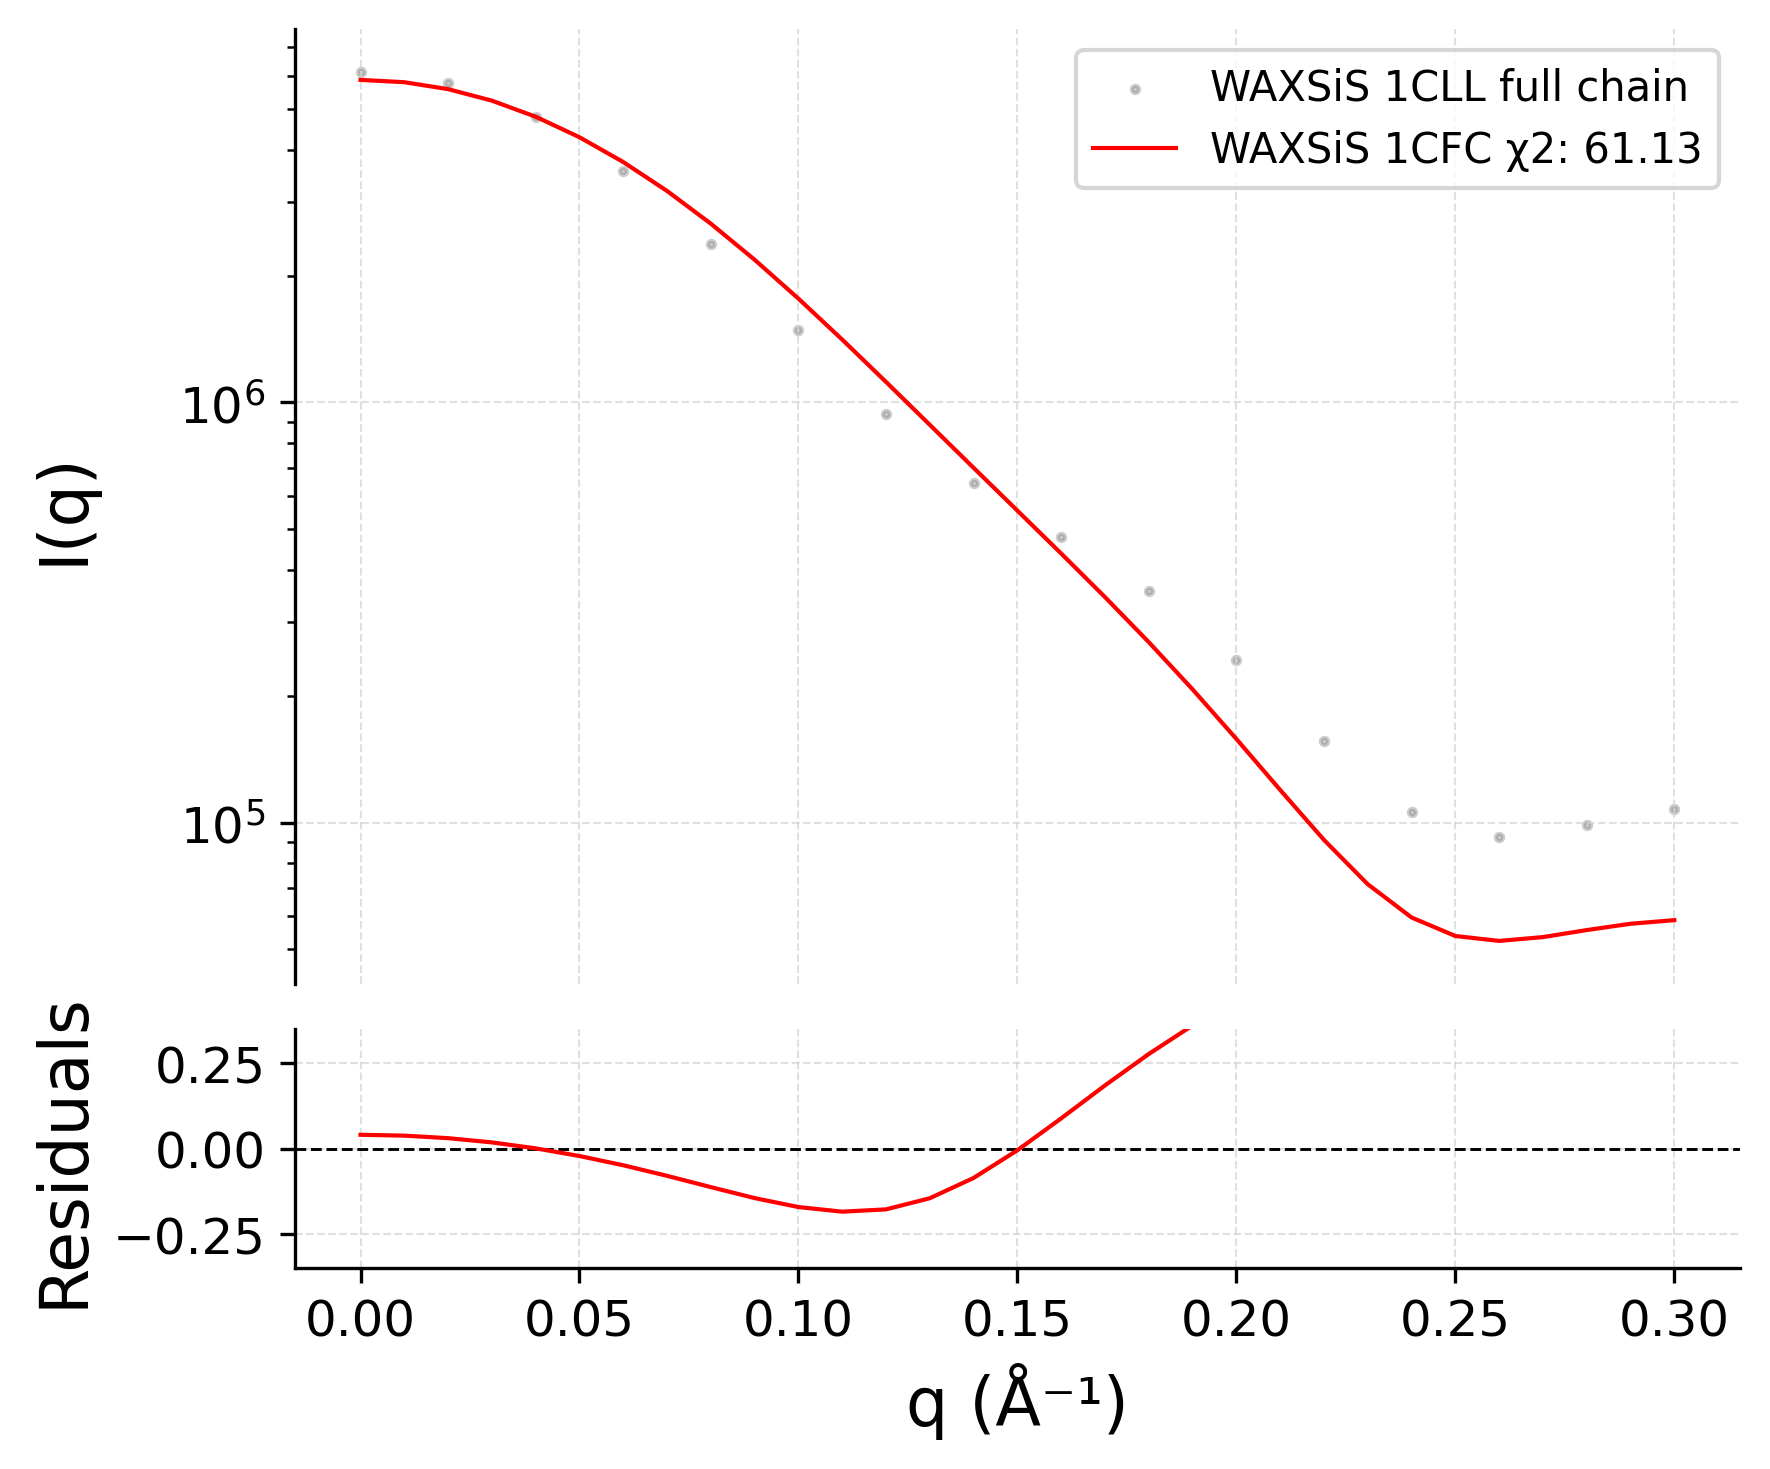

In [72]:
exp_data_file = '/Users/josh/Documents/PhD/MyPapers/carbonaraPapers/carbonaraTheory/code/apo_holo_pairs_complete/waxsresults.1cll_fullchain/intensity.dat'

waxsis_file = '/Users/josh/Downloads/waxsresults.1cfc_fullchain/intensity.dat'

arr_exp = np.genfromtxt(exp_data_file)
q_exp = arr_exp[:,0]
I_exp = arr_exp[:,1]
I_exp_err = arr_exp[:,2]

arr_model = np.genfromtxt(waxsis_file)
q_mod = arr_model[:,0]
I_mod = arr_model[:,1]

print('Data is for 1CLL - the target')
SAXS.fancy_SAXS_profile_1(q_exp, I_exp, I_exp_err, q_mod, I_mod, 'WAXSiS 1CFC', maxq=0.3, savename=None, data_label='WAXSiS 1CLL full chain')

Data is for 1CLL - the target


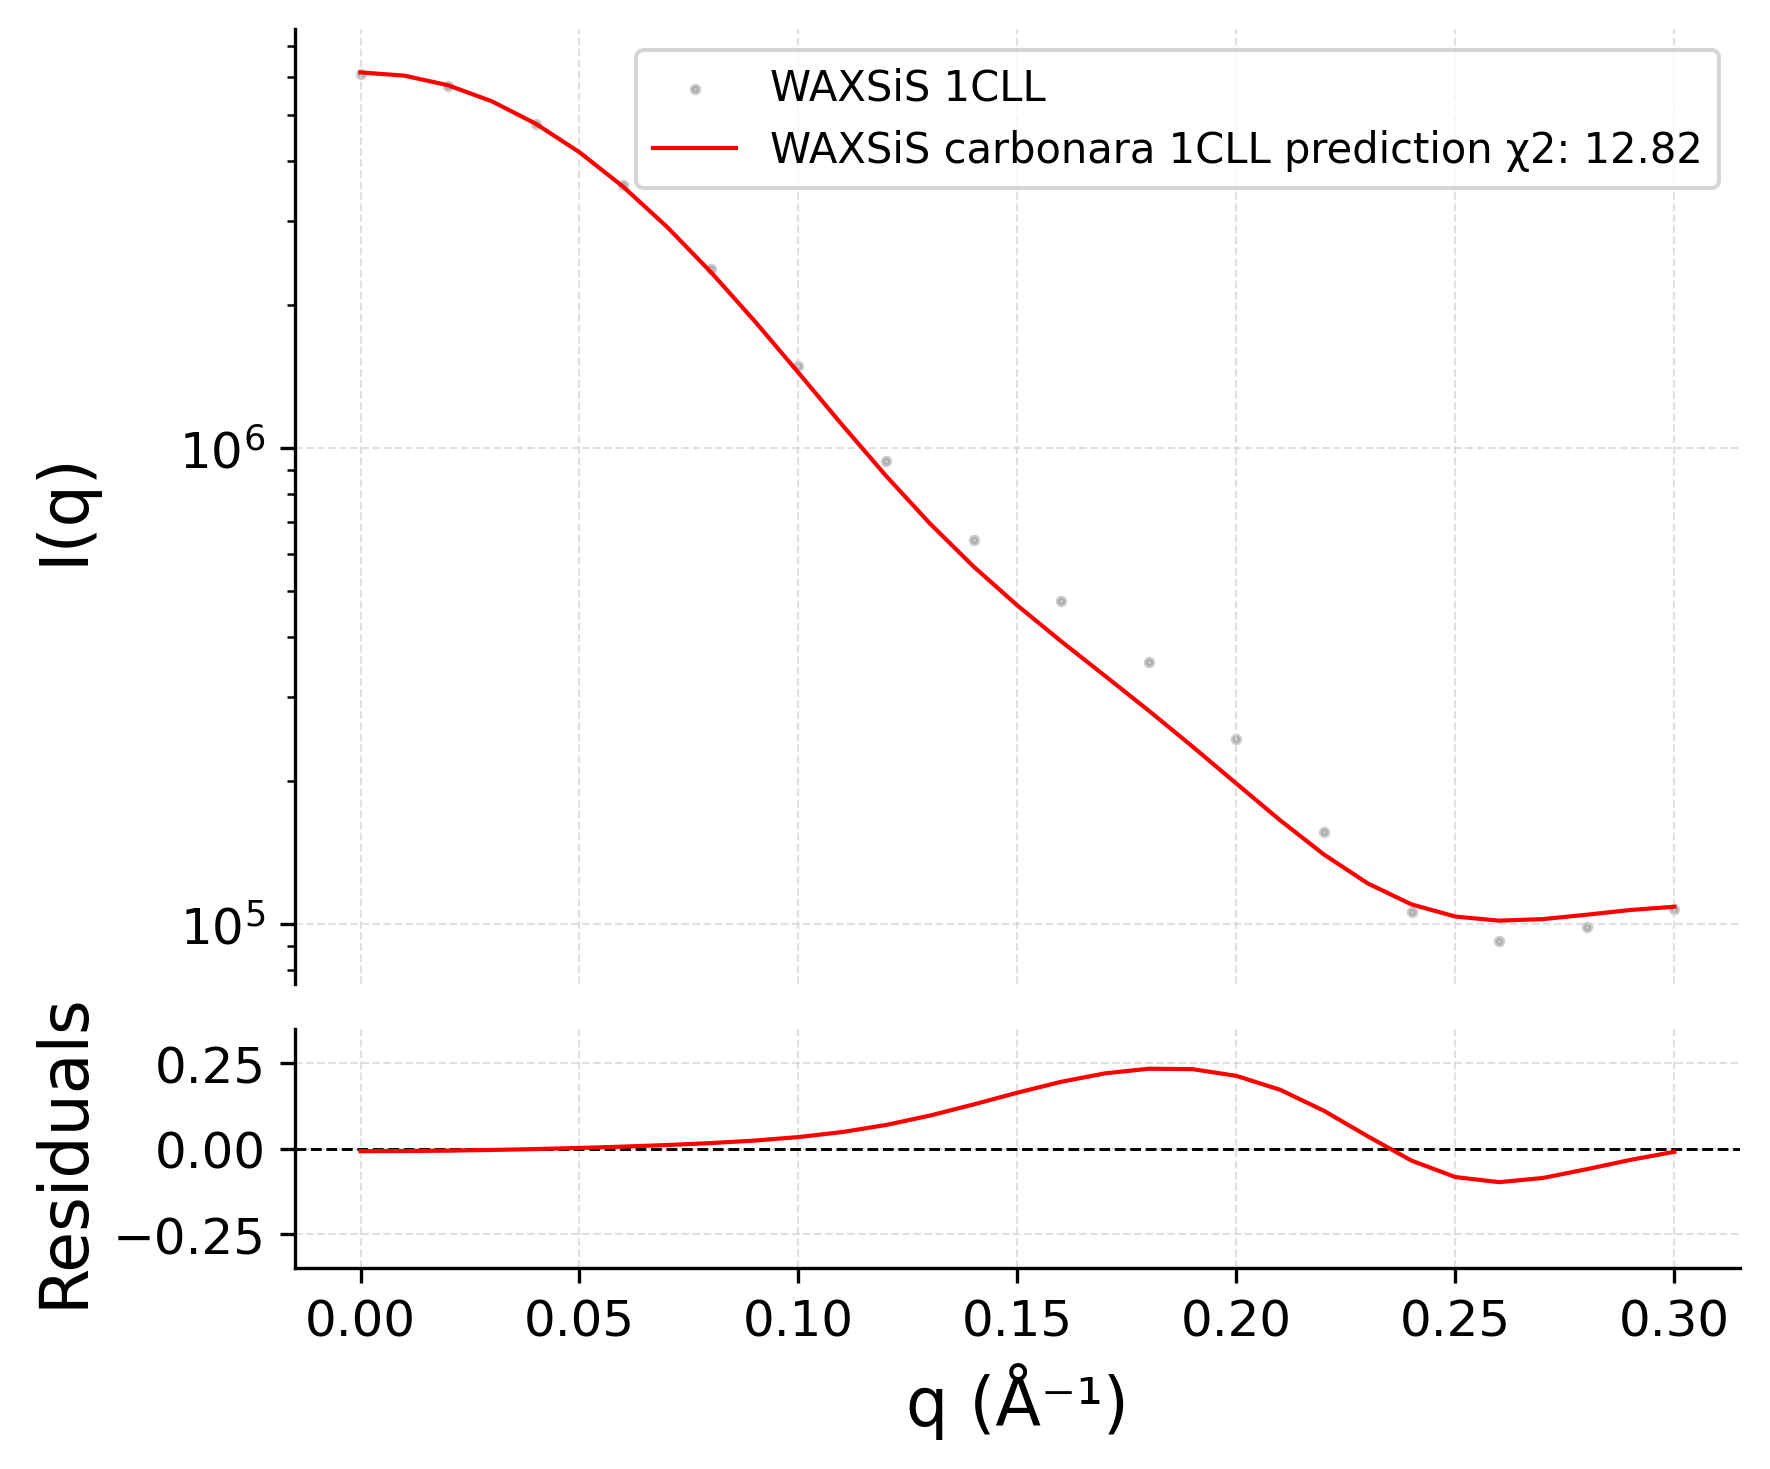

In [71]:
exp_data_file = '/Users/josh/Documents/PhD/MyPapers/carbonaraPapers/carbonaraTheory/code/apo_holo_pairs_complete/waxsresults.1cll_fullchain/intensity.dat'

waxsis_file = '/Users/josh/Documents/PhD/DevDungeon/carbonara/newFitData/calmodulin_WAXSiS/reconstructions/waxsresults.calmodulin_fullchain1cll_target_step19/intensity.dat'

arr_exp = np.genfromtxt(exp_data_file)
q_exp = arr_exp[:,0]
I_exp = arr_exp[:,1]
I_exp_err = arr_exp[:,2]

arr_model = np.genfromtxt(waxsis_file)
q_mod = arr_model[:,0]
I_mod = arr_model[:,1]

print('Data is for 1CLL - the target')
SAXS.fancy_SAXS_profile_1(q_exp, I_exp, I_exp_err, q_mod, I_mod, 'WAXSiS carbonara 1CLL prediction', maxq=0.3, savename=None, data_label='WAXSiS 1CLL')

Data is for 1CLL - the target


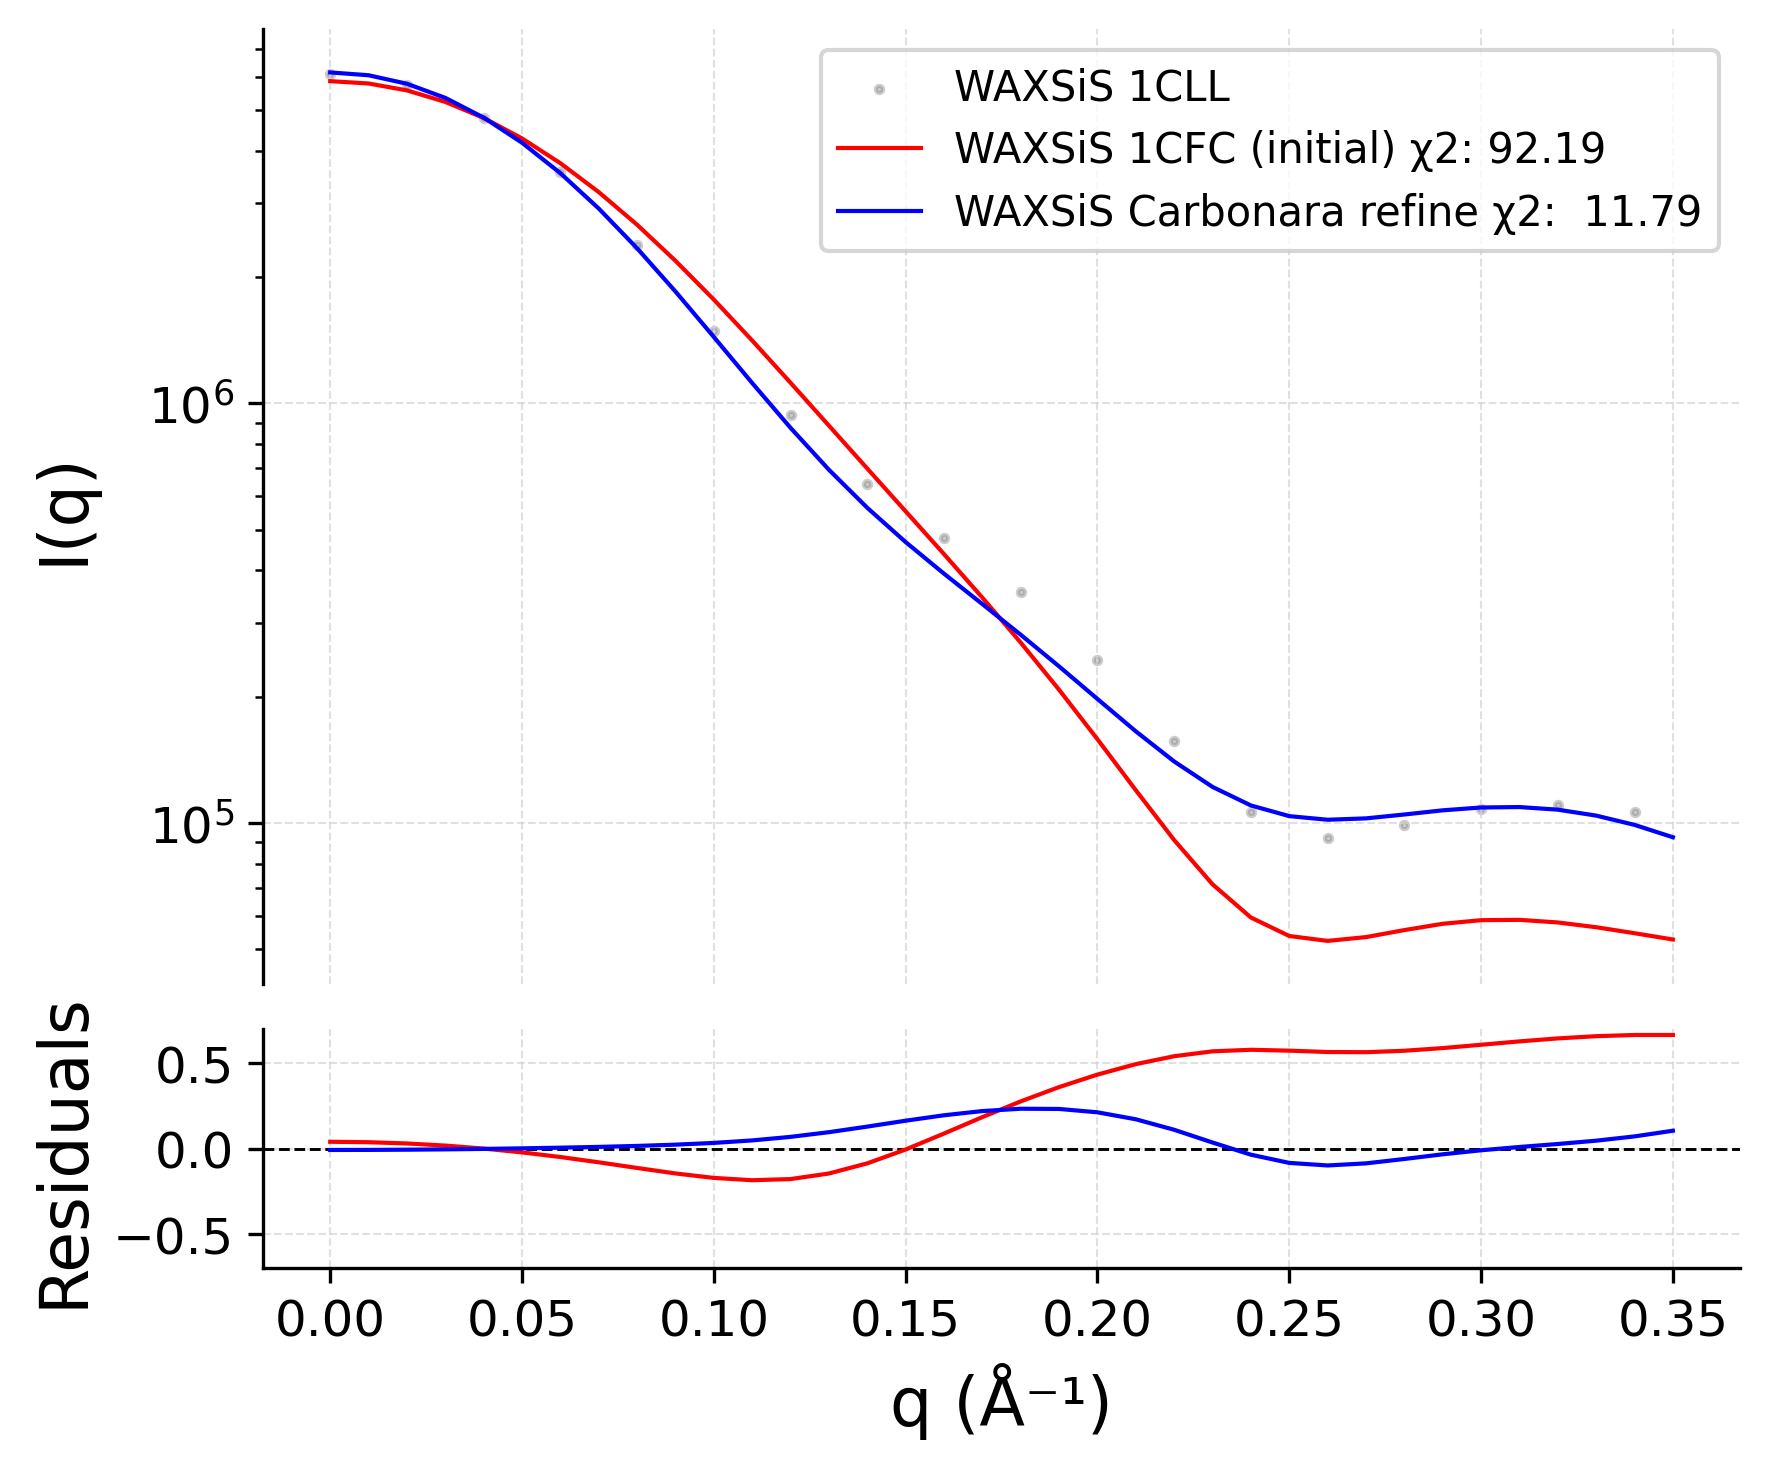

In [174]:
exp_data_file = '/Users/josh/Documents/PhD/MyPapers/carbonaraPapers/carbonaraTheory/code/apo_holo_pairs_complete/waxsresults.1cll_fullchain/intensity.dat'

waxsis_file1 = '/Users/josh/Downloads/waxsresults.1cfc_fullchain/intensity.dat'
waxsis_file2 = '/Users/josh/Documents/PhD/DevDungeon/carbonara/newFitData/calmodulin_WAXSiS/reconstructions/waxsresults.calmodulin_fullchain1cll_target_step19/intensity.dat'

arr_exp = np.genfromtxt(exp_data_file)
q_exp = arr_exp[:,0]
I_exp = arr_exp[:,1]
I_exp_err = arr_exp[:,2]

arr_model1 = np.genfromtxt(waxsis_file1)
q_mod1 = arr_model1[:,0]
I_mod1 = arr_model1[:,1]

arr_model2 = np.genfromtxt(waxsis_file2)
q_mod2 = arr_model2[:,0]
I_mod2 = arr_model2[:,1]

print('Data is for 1CLL - the target')
SAXS.fancy_SAXS_profile_2(q_exp, I_exp, I_exp_err, q_mod1, I_mod1, 'WAXSiS 1CFC (initial)', q_mod2, I_mod2, 'WAXSiS Carbonara refine',  maxq=0.35, savename=None, data_label='WAXSiS 1CLL', reslim=.7)

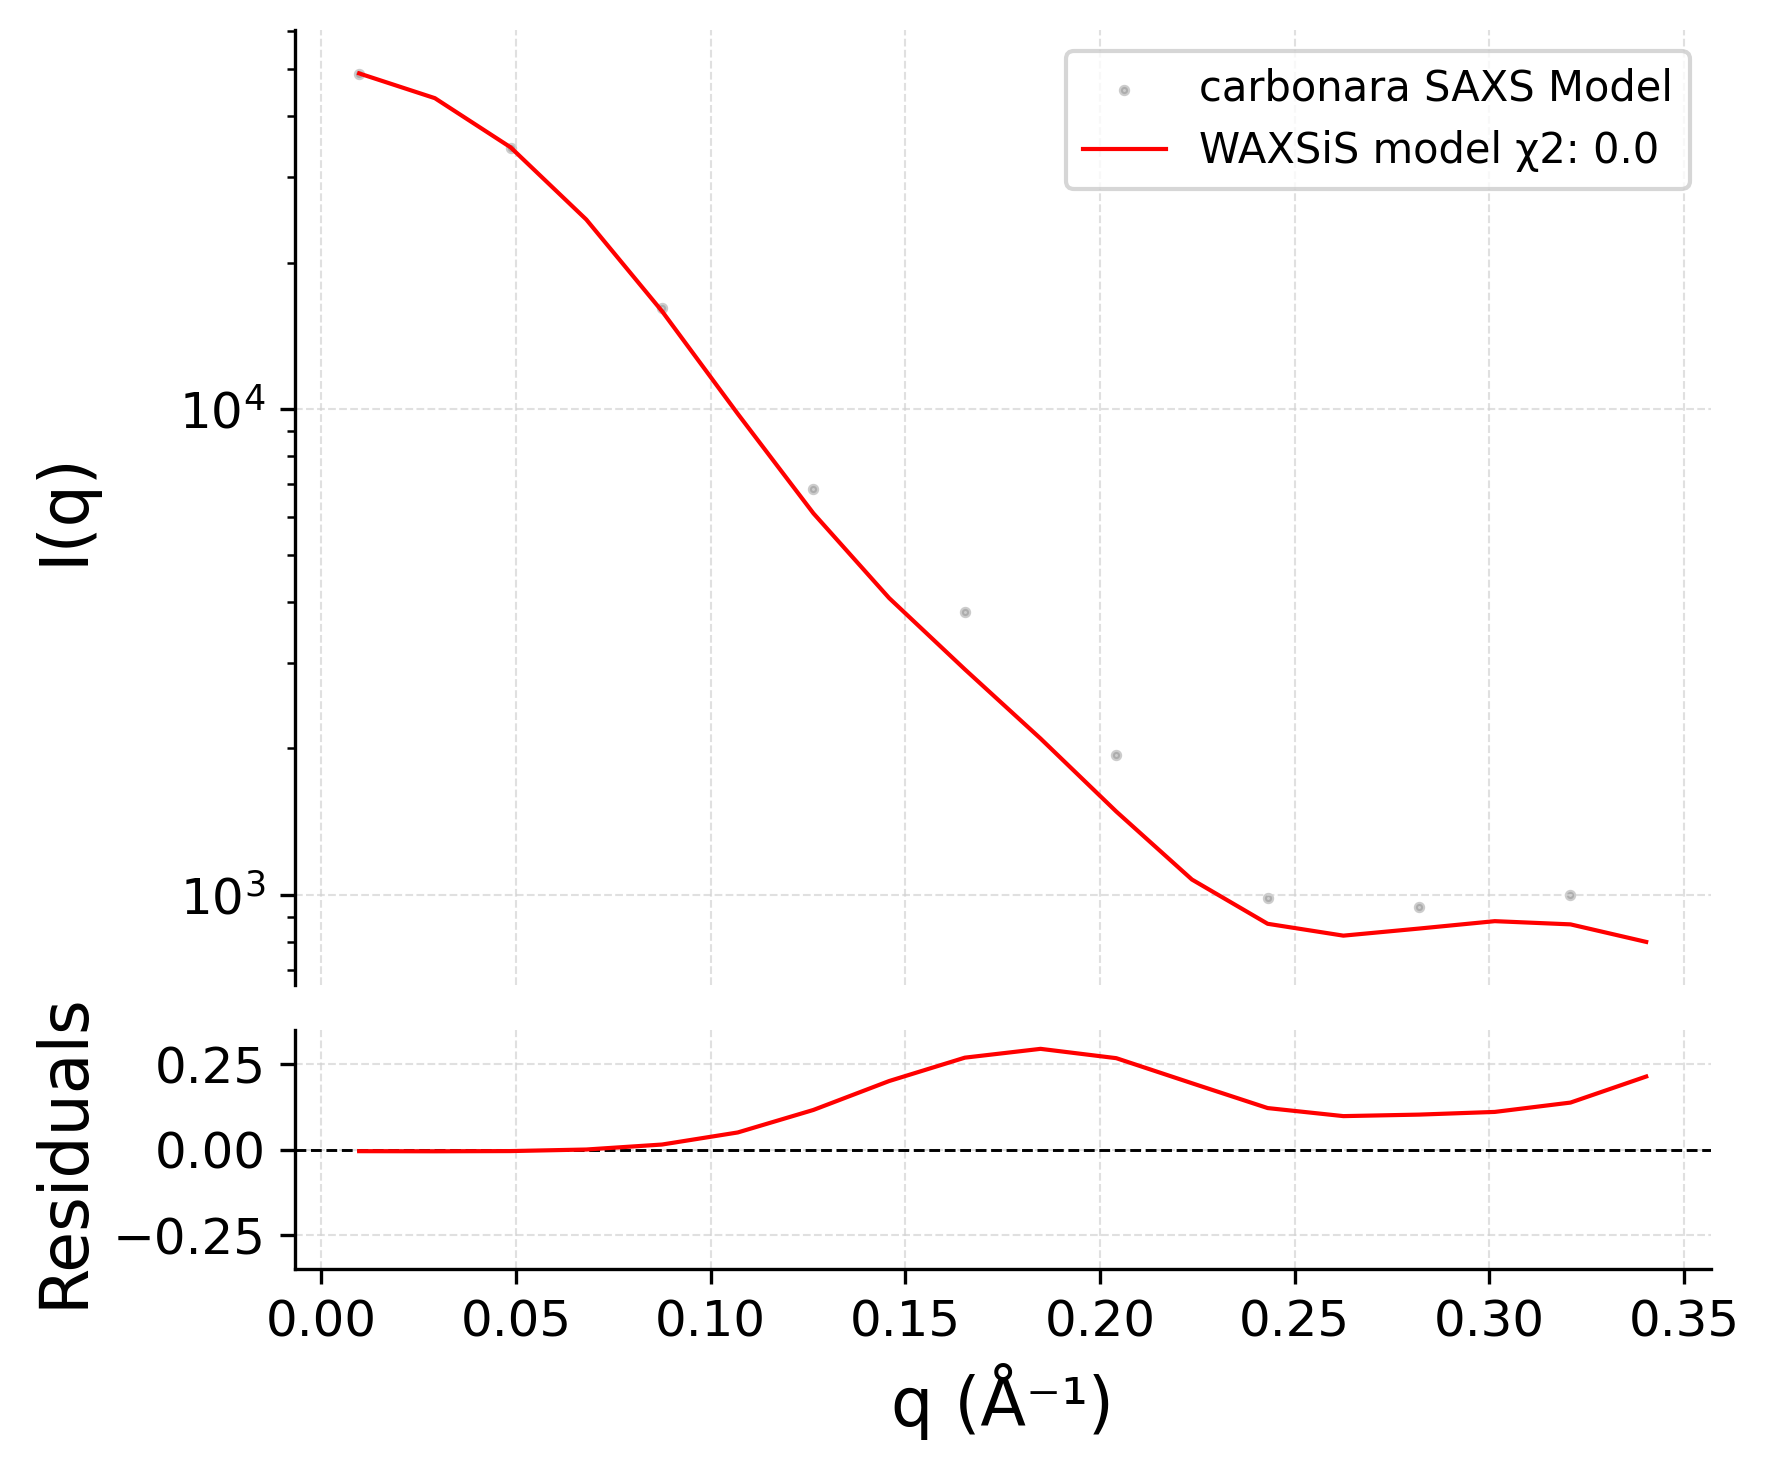

In [70]:


exp_data_file = '/Users/josh/Documents/PhD/DevDungeon/carbonara/newFitData/calmodulin_WAXSiS/reconstructions/waxsresults.calmodulin_fullchain1cll_target_step19/intensity.dat'

carbonara_fit = '/Users/josh/Documents/PhD/DevDungeon/carbonara/newFitData/calmodulin_WAXSiS/run1/mol1_step_15_scatter.dat'

arr_mod = np.genfromtxt(exp_data_file)
q_mod = arr_exp[:,0]
I_mod = arr_exp[:,1]
I_mod_err = arr_mod[:,2]

ferr = UnivariateSpline(q_mod, I_mod_err, s=0)

arr_exp = np.genfromtxt(carbonara_fit, skip_footer=1)
q_exp = arr_model[:,0]
I_exp = arr_model[:,1]

I_exp_err = ferr(q_exp)

SAXS.fancy_SAXS_profile_1(q_exp, I_exp, I_exp_err, q_mod, I_mod, 'WAXSiS model', maxq=1, savename=None, data_label='carbonara SAXS Model')

In [69]:
I_exp_err

array([77402.8  , 75848.2  , 71507.4  , 65248.2  , 58214.1  , 51474.   ,
       45672.5  , 40636.8  , 36462.6  , 32848.9  , 29520.1  , 26153.8  ,
       22781.8  , 19362.6  , 16333.5  , 14134.1  , 12595.4  , 11599.5  ,
       10909.   , 10199.2  ,  9205.57 ,  8003.68 ,  6930.99 ,  6192.21 ,
        5706.53 ,  5418.22 ,  5249.51 ,  5104.19 ,  4916.03 ,  4666.94 ,
        4369.47 ,  4046.07 ,  3722.84 ,  3430.52 ,  3197.84 ,  3034.88 ,
        2922.54 ,  2822.99 ,  2701.98 ,  2543.92 ,  2352.74 ,  2143.02 ,
        1927.52 ,  1709.28 ,  1485.08 ,  1263.05 ,  1160.75 ,  1092.44 ,
        1051.8  ,  1031.51 ,  1023.9  ,  1022.24 ,  1021.79 ,  1019.96 ,
        1015.93 ,  1010.02 ,  1003.31 ,   955.079,   934.977,  1015.61 ,
         938.532,  1010.4  ,   939.601,   905.066,   919.124,   934.662,
         800.567,   819.592,   804.485,   795.328,   742.442,   710.955,
         670.318,   655.985,   589.767,   603.32 ,   585.131,   558.622,
         553.905,   569.151,   555.588,   552.627, 

### Interpolating WAXSiS

In [ ]:
exp_data_file = '/Users/josh/Documents/PhD/MyPapers/carbonaraPapers/carbonaraTheory/code/apo_holo_pairs_complete/waxsresults.1cll_fullchain/intensity.dat'
arr_exp = np.genfromtxt(exp_data_file)

q_exp = arr_exp[:,0]
I_exp = arr_exp[:,1]

f1 = UnivariateSpline(q_exp, I_exp, s=0)
qs = np.linspace(0,1,500)
I_inter = f1(qs)

# plt.plot(q_exp, I_exp)
# plt.plot(qs, I_inter)
# plt.yscale('log')

saxs_arr = np.hstack((qs[:, np.newaxis], I_inter[:, np.newaxis]))
np.savetxt('SAXS4calmodulin_1cll_fullchain.dat', saxs_arr)

### Backmapping

In [171]:
ca_file = 'run5/mol1_sub_0_step_9_xyz.dat'
fp_file = 'fingerPrint1.dat'
write_d = 'reconstructions/'
bm.backmap_ca_chain(ca_file, fp_file, write_directory=write_d, name='cal_constraints_run5_step_9')

Alpha Coordinates pdb written to:  reconstructions/cal_constraints_run5_step_9_CA.pdb
All Atomistic pdb written to:  reconstructions/cal_constraints_run5_step_9_AA.pdb


In [48]:
dmax = 10
dopt = 5

dmin = 3.8

def reward(d):

    r = 1 - np.abs(d-dopt)/(dmax-dopt)

    r[d < 3.8] = 0
    r[r < 0] = 0

    return r

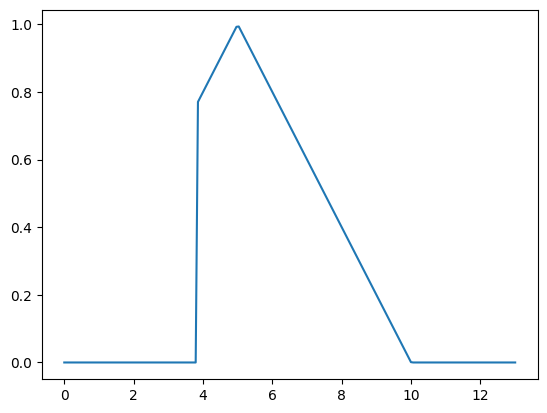

In [49]:
ds = np.linspace(0, 13, 200)

import matplotlib.pyplot as plt
plt.plot(ds, reward(ds))

In [53]:
original_CA , _, _,_ = cdt.pull_structure_from_pdb('/Users/josh/Documents/PhD/MyPapers/carbonaraPapers/carbonaraTheory/code/apo_holo_pairs_complete/1cfc_complete.pdb')

fp_arr = np.genfromtxt('fingerPrint1.dat', dtype=str, skip_header=1)
ss = fp_arr[1]
ss = np.asarray( list(ss) )

In [57]:
cdt.sheet_pairwise_bond_number()

TypeError: sheet_group_mask() missing 3 required positional arguments: 'group', 'sheet_groups', and 'endindex'

In [70]:
# Reference initial structure
sheet_coords = cdt.sheet_pipe('coordinates1.dat',
                              'fingerPrint1.dat')

ref_bonds = cdt.sheet_pairwise_bond_number(sheet_coords, thr=16.5)

In [71]:
ref_bonds

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [3., 9., 0., 0.],
       [0., 0., 0., 0.]])

In [73]:
ss

c_map = {'-':'yellow', 'H':'red', 'S':'blue'}
color_lst = []
for s in ss:
    color_lst.append(c_map[s])

In [75]:
ca = np.genfromtxt('coordinates1.dat')

In [93]:
cdt.line_plotly(ca[:,0], ca[:,1], ca[:,2], color_lst)
# add hover text

l = np.arange(1, len(ca)+1, 1)
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=ca[:,0], y=ca[:,1], z=ca[:,2], mode='lines', line=dict(color=color_lst, width=5), name='1cfc', 
              text=l, hovertemplate='res: %{text}'))

fig.update_layout(scene=dict(aspectmode='cube'), width=800, height=800, template='plotly_white')

In [85]:
99, 136

26, 68

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148])

In [134]:
np.linalg.norm(ca[98] - ca[136]) 

4.484810475371283

In [125]:
np.linalg.norm(ca[25] - ca[63]) 

4.3150031286199555

In [117]:
!pwd

/Users/josh/Documents/PhD/DevDungeon/carbonara/newFitData/calmodulin_WAXSiS


In [135]:
contactPreds = [[99, 137], [26, 64]]
fixedDistSet=[]

# cdt.translate_distance_constraints(contactPreds,np.genfromtxt('coordinates1.dat'),'/Users/josh/Documents/PhD/DevDungeon/carbonara/newFitData/calmodulin_WAXSiS/',fixedDistSet)

def translate_distance_constraints(contactPredsIn,coords,working_path,fixedDistList=[]):
    # shift the coordinates back one to fit [0,1, array labelling
    contactPreds =contactPredsIn
    dists= []
    for i in range(len(contactPredsIn)):
        contactPreds[i][0] = contactPredsIn[i][0]
        contactPreds[i][1] = contactPredsIn[i][1]
    contactPredNara = []
    for i in range(len(contactPreds)):
        contactPreds[i].sort()
        currIndex=0;
        ss = cdt.get_secondary(working_path+"fingerPrint1.dat")
        sections = cdt.section_finder_sub(ss)
        currMax=len(sections[0])
        prevMax=0
        while (contactPreds[i][0]>currMax and currIndex<len(sections)):
            currIndex= currIndex+1
            currMax=currMax+len(sections[currIndex])
            prevMax = prevMax+len(sections[currIndex-1])
           # second coord of pair
        pair1 =[currIndex,contactPreds[i][0]-prevMax-1]
        currIndex=0;
        currMax=len(sections[0])
        prevMax=0
        while (contactPreds[i][1]>currMax and currIndex<len(sections)):
            currIndex= currIndex+1
            currMax=currMax+len(sections[currIndex])
            prevMax = prevMax+len(sections[currIndex-1])
        pair2 =[currIndex,contactPreds[i][1]-prevMax-1]
        if len(fixedDistList)>0:
            dist = fixedDistList[i]
        else:
            dist = np.linalg.norm(coords[contactPreds[i][1]-1]-coords[contactPreds[i][0]-1])
        # contactPredNara.append(pair1+pair2+[dist])
        contactPredNara.append(pair1+pair2+[dist]+[0.1])
        dists.append(dist)

        # now write to file
    print("distances in  current structure ",dists)
    np.savetxt(working_path+"fixedDistanceConstraints1.dat",contactPredNara,fmt="%i %i %i %i %1.10f %1.10f")

In [136]:
translate_distance_constraints(contactPreds,ca,'',fixedDistList=[])

distances in  current structure  [4.484810475371283, 4.3150031286199555]


In [ ]:
contactPreds = [[231,686],[228,683],[225,591],[136,680],[830,890],[375,435],[149,205],[604,660],[719,784],[477,551],[22,96],[264,329]]
fixedDistSet=[]
#if I wanted to fix these distances as 6 a fixedDistSet = [6.0,6.0,6.0,6.0]
cdt.translate_distance_constraints(contactPreds,coords,splitList,working_path,fixedDistSet)

In [124]:
np.linalg.norm(ca[25] - ca[61]) 

6.916344771626122